In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, BatchNormalization,MaxPool2D, GlobalMaxPool2D
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
# load data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() # because target have 2 dim shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)
(10000,)


In [4]:
# number of classes
N = len(set(y_train))
print('number of classes: ', N)

number of classes:  10


In [5]:
# Build the model using functional API 
# Without data agumentation
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D((2, 2))(x)

x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D((2, 2))(x)

x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D((2, 2))(x)

x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(N, activation='softmax')(x)

model = Model(i, x)

In [6]:
# Compile using GPU
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Fit
# m = model.fit(
#     x_train, y_train,
#     validation_data = (x_test, y_test),
#     epochs = 50
# )

Epoch 1/50
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4864 - accuracy: 0.4605 - val_loss: 1.2217 - val_accuracy: 0.5676
Epoch 2/50
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0598 - accuracy: 0.6233 - val_loss: 0.9067 - val_accuracy: 0.6769
Epoch 3/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.8948 - accuracy: 0.6872 - val_loss: 0.8214 - val_accuracy: 0.7064
Epoch 4/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7928 - accuracy: 0.7260 - val_loss: 0.8831 - val_accuracy: 0.7023
Epoch 5/50
1563/1563 [==============================] - 24s 16ms/step - loss: 0.7190 - accuracy: 0.7532 - val_loss: 0.7291 - val_accuracy: 0.7582
Epoch 6/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6622 - accuracy: 0.7734 - val_loss: 0.5923 - val_accuracy: 0.7986
Epoch 7/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6187 - accuracy: 0.7895 - val_loss: 0.5843 -

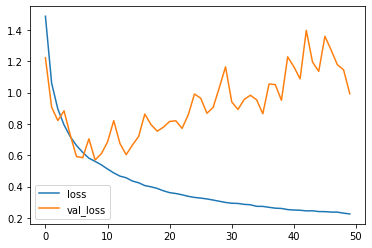

In [ ]:
# # Plot loss per iteration
# import matplotlib.pyplot as plt
# plt.plot(m.history['loss'], label='loss')
# plt.plot(m.history['val_loss'], label='val_loss')
# plt.legend()

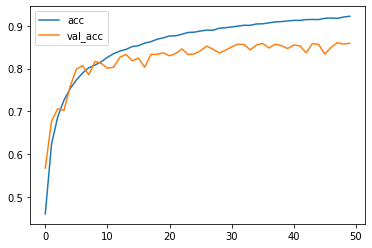

In [ ]:
# # Plot accuracy per iteration
# plt.plot(m.history['accuracy'], label='acc')
# plt.plot(m.history['val_accuracy'], label='val_acc')
# plt.legend()

Confusion matrix, without normalization
[[909  10  22   2   6   3   1   6  29  12]
 [ 11 932   2   1   1   1   2   0  10  40]
 [ 59   0 801  24  40  22  31  17   4   2]
 [ 39   3  37 704  45  90  47  24   7   4]
 [ 14   1  36  12 860  21  24  27   5   0]
 [ 20   1  23 108  28 767  17  31   2   3]
 [ 10   3  28  22  16   7 907   2   4   1]
 [  9   1  11  19  28  18   8 899   4   3]
 [ 46  13   6   6   3   0   3   2 913   8]
 [ 20  45   4   4   2   2   5   2  17 899]]


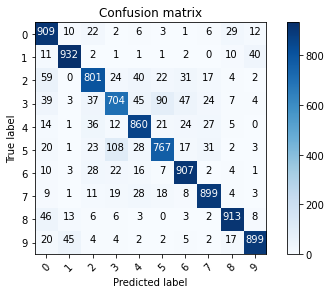

In [ ]:
# # Plot confusion matrix
# from sklearn.metrics import confusion_matrix
# import itertools

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#   """
#   This function prints and plots the confusion matrix.
#   Normalization can be applied by setting `normalize=True`.
#   """
#   if normalize:
#       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#       print("Normalized confusion matrix")
#   else:
#       print('Confusion matrix, without normalization')

#   print(cm)

#   plt.imshow(cm, interpolation='nearest', cmap=cmap)
#   plt.title(title)
#   plt.colorbar()
#   tick_marks = np.arange(len(classes))
#   plt.xticks(tick_marks, classes, rotation=45)
#   plt.yticks(tick_marks, classes)

#   fmt = '.2f' if normalize else 'd'
#   thresh = cm.max() / 2.
#   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#       plt.text(j, i, format(cm[i, j], fmt),
#                horizontalalignment="center",
#                color="white" if cm[i, j] > thresh else "black")

#   plt.tight_layout()
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.show()


# p_test = model.predict(x_test).argmax(axis=1)
# cm = confusion_matrix(y_test, p_test)
# plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# # label mapping
# labels = '''airplane
# automobile
# bird
# cat
# deer
# dog
# frog
# horse
# ship
# truck'''.split()

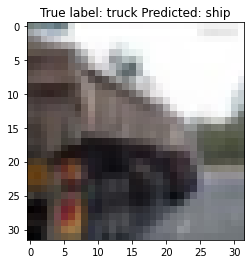

In [ ]:
# # Show some misclassified examples
# misclassified_idx = np.where(p_test != y_test)[0]
# i = np.random.choice(misclassified_idx)
# plt.imshow(x_test[i], cmap='gray')
# plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
# turn back and run all cells until previous fit cell (do not run fit cell), stop there and come and run cell below and go on

In [7]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

In [8]:
# Fit with data augmentation
epochs = 50
batch_size = 86
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1)

data_generator.fit(x_train)

In [9]:
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [10]:
r = model.fit(
    train_generator, 
    validation_data=(x_test, y_test), 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs,
    callbacks=learning_rate_reduction)

Epoch 1/50
581/581 [==============================] - 42s 73ms/step - loss: 1.6351 - accuracy: 0.4465 - val_loss: 1.1965 - val_accuracy: 0.5672 - lr: 0.0010
Epoch 2/50
581/581 [==============================] - 42s 72ms/step - loss: 1.1351 - accuracy: 0.5960 - val_loss: 1.1507 - val_accuracy: 0.6142 - lr: 0.0010
Epoch 3/50
581/581 [==============================] - 42s 72ms/step - loss: 0.9618 - accuracy: 0.6616 - val_loss: 0.9937 - val_accuracy: 0.6585 - lr: 0.0010
Epoch 4/50
581/581 [==============================] - 42s 72ms/step - loss: 0.8621 - accuracy: 0.7013 - val_loss: 0.8311 - val_accuracy: 0.7161 - lr: 0.0010
Epoch 5/50
581/581 [==============================] - 43s 73ms/step - loss: 0.7985 - accuracy: 0.7238 - val_loss: 0.8290 - val_accuracy: 0.7204 - lr: 0.0010
Epoch 6/50
581/581 [==============================] - 42s 73ms/step - loss: 0.7528 - accuracy: 0.7404 - val_loss: 0.8715 - val_accuracy: 0.7122 - lr: 0.0010
Epoch 7/50
581/581 [==============================] - 42s 

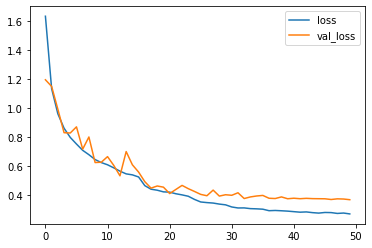

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

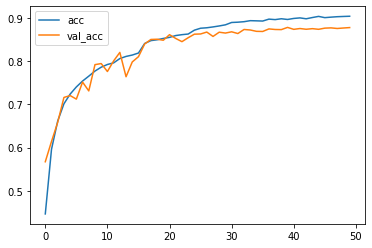

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[899  11  22   3   8   0   8   3  27  19]
 [  3 948   1   0   0   0   2   1   7  38]
 [ 29   2 828  17  31  20  55   7   5   6]
 [ 18   7  36 725  34  62  75  16   7  20]
 [  5   1  33  17 860   8  53  20   3   0]
 [  4   1  19 114  41 754  32  26   1   8]
 [  3   1   9  13   4   0 964   3   1   2]
 [ 10   0  10  11  27  12   6 917   0   7]
 [ 29   8   2   1   1   0   4   1 934  20]
 [  3  37   0   2   1   0   2   1   5 949]]


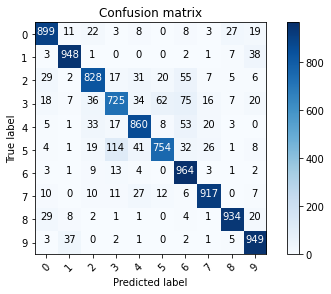

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [14]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

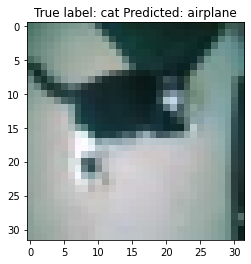

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [16]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0     